<a href="https://colab.research.google.com/github/codesgil/colab-facial/blob/main/article_bon_perso_x20_crop_5749_Adam__20_epoch_function_resnet_(SAVE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face recognition with RESNET50(here the PERSONAL dataset and has been trained over 20 epochs)**


Trouvé 1 visage personnel!



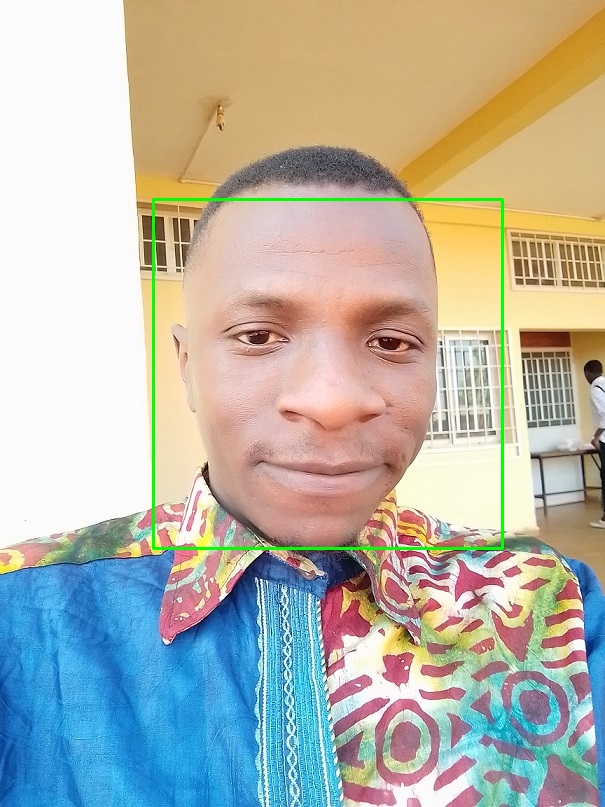

In [ ]:
# coding:utf-8
import cv2
from google.colab.patches import cv2_imshow

# Image path
img_path = "/content/drive/MyDrive/Datasets/humain/photo/gil.jpg"

# Get trained face parameter data, referring to the opencv library defaults on GitHub here

face_cascade = cv2.CascadeClassifier(r'/content/drive/MyDrive/Colab Notebooks/projects/detection_haar_MTCNN/haarcascade_frontalface_default.xml')

# Read the image and transform it into a grayscale image

image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor = 1.15,
    minNeighbors = 5,
    minSize = (5, 5),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print("Trouvé{0} visage personnel!\n".format(len(faces)))
for(x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+w),(0,255,0),2)

cv2_imshow(image)

In [ ]:
!pip install opencv-python
!pip install google-colab

In [ ]:
!pip install dlib

# **FACE DETECTION WITH THE HOG ALGORITHM AND ALIGNMENT WITH THE 68 POINTS**

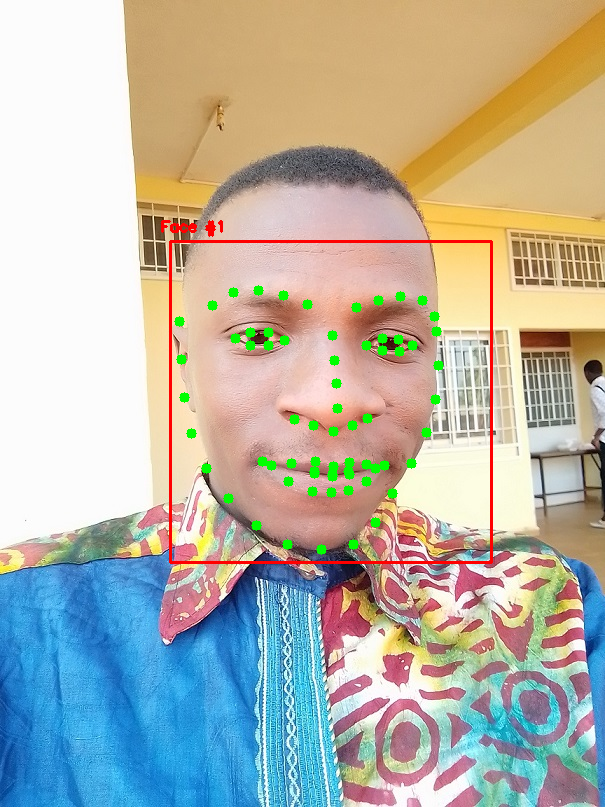

-1

In [ ]:
from google.colab.patches import cv2_imshow
import dlib
import cv2
from imutils import face_utils
import matplotlib.pyplot as plt

image = cv2.imread("/content/drive/MyDrive/data/gil.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/data/shape_predictor_68_face_landmarks.dat")

dots_size = 5

rects = detector(gray, 1)
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # show the face numberm
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), dots_size, (0, 255, 0), -1)

# show the output image with the face detections + facial landmarks
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
# Télécharger le jeu de données sur les visages alignés sur Youtube
!wget --http-user=wolftau --http-password=wtal997 http://www.cslab.openu.ac.il/download/wolftau/aligned_images_DB.tar.gz
%cd /content/drive/MyDrive/Datasets/humain

--2021-02-06 17:29:40--  http://www.cslab.openu.ac.il/download/wolftau/aligned_images_DB.tar.gz
Resolving www.cslab.openu.ac.il (www.cslab.openu.ac.il)... 192.114.0.68
Connecting to www.cslab.openu.ac.il (www.cslab.openu.ac.il)|192.114.0.68|:80... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Restricted Content"
Reusing existing connection to www.cslab.openu.ac.il:80.
HTTP request sent, awaiting response... 200 OK
Length: 5740942762 (5.3G) [application/x-gzip]
Saving to: ‘aligned_images_DB.tar.gz’

aligned_images_DB.t 100%[===================>]   5.35G  18.6MB/s    in 4m 54s  

2021-02-06 17:34:35 (18.6 MB/s) - ‘aligned_images_DB.tar.gz’ saved [5740942762/5740942762]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Décompresser l'ensemble des données téléchargées

%cd /content/drive/MyDrive/Datasets/humain
!mkdir -p data
!tar -zxf aligned_images_DB.tar.gz -C ./data


/content/drive/MyDrive/Datasets/humain


In [ ]:
import os
from PIL import Image

'''
  crop_img_by_half_center

  Crop a 1/2-size image from 1/4 and scale it
'''
def crop_img_by_half_center(src_file_path, dest_file_path):
  # Open image
    im = Image.open(src_file_path)
    # Get image size
    x_size, y_size = im.size
    # How to start harvesting
    start_point_xy = x_size / 4
    # Coordinates at the end of harvest
    end_point_xy   = x_size / 4 + x_size / 2
    # Generate square boxes
    box = (start_point_xy, start_point_xy, end_point_xy, end_point_xy)
    # Crops
    new_im = im.crop(box)
    # Scale (55, 47)
    new_new_im = new_im.resize((47,55))
    # Save
    new_new_im.save(dest_file_path)

    '''
  browse_the_folder_for_crop

 Browse the dataset folder for the image to generate the target folder
'''

def walk_through_the_folder_for_crop(aligned_db_folder, result_folder):
    if not os.path.exists(result_folder):
        os.mkdir(result_folder)

    i = 0
    img_count = 0
    for people_folder in os.listdir(aligned_db_folder):
        src_people_path = aligned_db_folder + people_folder + '/'
        dest_people_path = result_folder + people_folder + '/'
        if not os.path.exists(dest_people_path):
            os.mkdir(dest_people_path)
        for video_folder in os.listdir(src_people_path):
            src_video_path = src_people_path + video_folder + '/'
            dest_video_path = dest_people_path + video_folder + '/'
            if not os.path.exists(dest_video_path):
                os.mkdir(dest_video_path)
            for img_file in os.listdir(src_video_path):
                src_img_path = src_video_path + img_file
                dest_img_path = dest_video_path + img_file
                crop_img_by_half_center(src_img_path, dest_img_path)
            i += 1
            img_count += len(os.listdir(src_video_path))

if __name__ == '__main__':
    aligned_db_folder = r'/content/drive/MyDrive/data/lfw/crop/lfw_data'
    result_folder =  r'/content/drive/MyDrive/data/lfw/crop/crop_lfw_data'
    if not aligned_db_folder.endswith('/'):
        aligned_db_folder += '/'
    if not result_folder.endswith('/'):
        result_folder += '/'
    walk_through_the_folder_for_crop(aligned_db_folder, result_folder)

NotADirectoryError: ignored

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!unzip /content/drive/MyDrive/Datasets/humain/data_lfw/perso/crop_perso10.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: crop_perso/Colin_Powell/Colin_Powell_0058.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0059.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0060.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0061.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0062.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0063.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0064.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0065.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0066.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0067.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0068.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0069.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0070.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0071.jpg  
  inflating: crop_perso/Colin_Powell/Colin_Powell_0072.jpg  
  infla

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 7.0 MB/s 


# **SAMPLE TRAINING WITH OUR PERSONAL DATASET OF 1170 IMAGES IN A CNN RESNET50 **

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, Conv2D,Flatten,Dense,MaxPool2D, MaxPooling2D, ZeroPadding2D, BatchNormalization,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import  ImageDataGenerator, load_img
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import Callback
import keras
import tensorflow as tf
import tensorflow_addons as tfa
import time
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_height, img_width = (224,224)
batch_size = 32
#num_classes=10

train_data_dir = '/content/crop_perso'
valid_data_dir = '/content/crop_perso'
test_data_dir = '/content/crop_perso'

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
    )

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10756 images belonging to 1170 classes.
Found 2679 images belonging to 1170 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2679 images belonging to 1170 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(32, 224, 224, 3)

In [ ]:
train_generator.num_classes

1170

In [ ]:
#Implementation of Identity Block

def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
#Implementation of Convolutional Block

def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
#Implementation of ResNet-50

def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(x)
x = Dense(512, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(x)
x = Dense(train_generator.num_classes, activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(x)

model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________________________________________________________________________________________

In [ ]:
resnet_weight='/content/drive/MyDrive/Datasets/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
base_model.load_weights(resnet_weight)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f89ca391810> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f89ca39de50> False
<keras.layers.convolutional.Conv2D object at 0x7f89ca31f450> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f89ca3fa450> False
<keras.layers.core.Activation object at 0x7f89c9dd3890> False
<keras.layers.pooling.MaxPooling2D object at 0x7f89ced26cd0> False
<keras.layers.convolutional.Conv2D object at 0x7f89ca31fa50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f89c9de4a90> False
<keras.layers.core.Activation object at 0x7f89ca39ddd0> False
<keras.layers.convolutional.Conv2D object at 0x7f89c8aacb90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f89c8bba810> False
<keras.layers.core.Activation object at 0x7f89c8b77190> False
<keras.layers.convolutional.Conv2D object at 0x7f89cb550890> False
<keras.layers.convolutional.Conv2D obje

In [ ]:
#from keras.callbacks import EarlyStopping,ModelCheckpoint

#Early Stoping
#es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)

#Model Check Point
#mc = ModelCheckpoint('C:/Users/hp/Downloads/data/batch-512-aligned/lfw_data_10/resnet/adam/best_model.h5', monitor='val_accuracy', mode='auto')


best_model = '/content/drive/MyDrive/Datasets/humain/data_lfw/perso/Adam/save_modelx10/20_epoch/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=best_model,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
from keras import optimizers
import tensorflow

num_class=1170


Adam = tensorflow.keras.optimizers.Adam(lr=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy', tfa.metrics.F1Score(num_classes=num_class,threshold = 0.5), keras.metrics.Precision(), keras.metrics.Recall()])

history = model.fit_generator(train_generator,
          epochs=20,
          validation_data=valid_generator,
          callbacks=[model_checkpoint_callback]

          )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
337/337 [==============================] - 156s 407ms/step - loss: 6.6840 - accuracy: 0.0575 - f1_score: 7.1234e-04 - precision: 1.0000 - recall: 7.4377e-04 - val_loss: 5.8538 - val_accuracy: 0.1687 - val_f1_score: 0.0057 - val_precision: 1.0000 - val_recall: 0.0082
Epoch 2/20
337/337 [==============================] - 137s 405ms/step - loss: 5.0853 - accuracy: 0.2632 - f1_score: 0.0424 - precision: 1.0000 - recall: 0.0536 - val_loss: 3.9380 - val_accuracy: 0.4177 - val_f1_score: 0.0904 - val_precision: 1.0000 - val_recall: 0.1374
Epoch 3/20
337/337 [==============================] - 136s 402ms/step - loss: 3.3166 - accuracy: 0.5387 - f1_score: 0.1679 - precision: 0.9973 - recall: 0.2042 - val_loss: 2.2703 - val_accuracy: 0.7245 - val_f1_score: 0.2538 - val_precision: 0.9988 - val_recall: 0.3038
Epoch 4/20
337/337 [==============================] - 136s 404ms/step - loss: 1.9142 - accuracy: 0.7794 - f1_score: 0.3970 - precision: 0.9981 - recall: 0.3882 - val_loss: 1.1926 - v

In [ ]:

model.save('/content/drive/MyDrive/Datasets/humain/data_lfw/perso/Adam/save_modelx10/20_epoch/best_model_20_epoch.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model.load_weights(best_model)

In [ ]:
test_loss, test_acc, test_f1_score, test_precision, test_recall = model.evaluate(test_generator, batch_size = 32, verbose=2)
print('\nTest loss:',test_loss)

84/84 - 28s - loss: 0.0912 - accuracy: 0.9877 - f1_score: 0.9856 - precision: 0.9992 - recall: 0.9784

Test loss: 0.09115195274353027


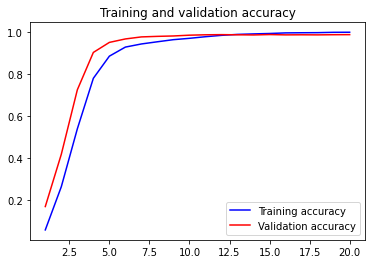

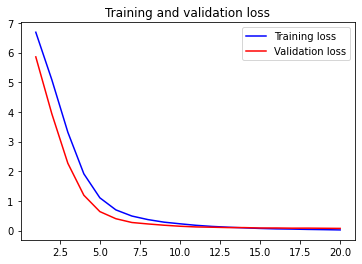

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs= range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/Datasets/humain/data_lfw/perso/Adam/save_modelx10/20_epoch/AccVal_acc')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets/humain/data_lfw/perso/Adam/save_modelx10/20_epoch/LossVal_loss')